In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

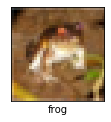

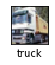

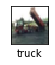

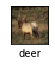

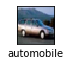

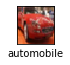

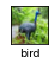

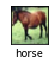

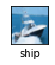

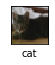

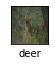

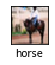

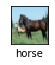

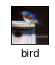

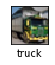

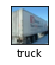

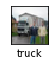

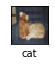

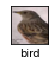

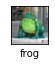

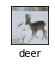

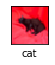

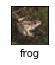

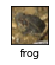

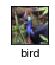

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
# The CIFAR labels happen to be arrays,
# which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
    plt.show()


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10))


In [9]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, epochs=10,
validation_data=(test_images, test_labels))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 117s 2ms/sample - loss: 1.4639 - acc: 0.4844 - val_loss: 1.2330 - val_acc: 0.5641
Epoch 2/10
50000/50000 [==============================] - 126s 3ms/sample - loss: 1.1493 - acc: 0.5959 - val_loss: 1.1396 - val_acc: 0.5996
Epoch 3/10
50000/50000 [==============================] - 133s 3ms/sample - loss: 1.0201 - acc: 0.6433 - val_loss: 1.1160 - val_acc: 0.6078
Epoch 4/10
50000/50000 [==============================] - 136s 3ms/sample - loss: 0.9326 - acc: 0.6765 - val_loss: 1.0413 - val_acc: 0.6348
Epoch 5/10
50000/50000 [==============================] - 140s 3ms/sample - loss: 0.8595 - acc: 0.6999 - val_loss: 1.0110 - val_acc: 0.6470
Epoch 6/10
50000/50000 [==============================] - 149s 3ms/sample - loss: 0.7903 - acc: 0.7288 - val_loss: 1.0253 - val_acc: 0.6437
Epoch 7/10
50000/50000 [==============================] - 155s 3ms/sample - loss: 0.7275 - acc: 0.7514 - val_l

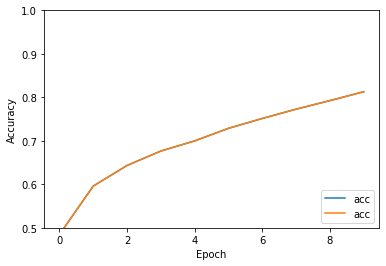

In [14]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['acc'], label = 'acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 8s - loss: 1.0532 - acc: 0.6520
